# ANALYSIS USING LINEAR REGRESSION MODELS

In this notebook we will create **3 multivariate regression models** using our linear regression module with **3 different sets of feature list**. We will take a note of the performance of the models, and discuss the performance results of each model.

**Add the directory of the m_learn package to the system path**

In [1]:
from config import append_path
append_path('../../')

**Import necessary packages and modules**

In [2]:
import pandas as pd
import numpy as np
from m_learn.linear_model import linear_regression
from m_learn.utility.data_preprocessing import get_xy_data
from sklearn.model_selection import train_test_split

## 1. Load and Inspect the data

**Load the data**

In [4]:
data = pd.read_csv('./../../data/house_prices/train.csv')

**Fill NaN with column means**

In [5]:
data = data.fillna(data.mean())

**Display the data head**

In [6]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


**Split the data into train & test sets**

In [7]:
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 1)

## 2. Train the Model

**Features and output of the regression model**

In [8]:
model_features = ['GrLivArea', 'LotArea'] 
output = 'SalePrice'

**Extract the feature matrix and output vector from the training set**

In [9]:
(train_feature_matrix, train_output) = get_xy_data(train_data, model_features, output)

**Model parameters**

In [10]:
step_size = 4e-12
tolerance = 1e9

**Create and fit a linear regression model using feature matrix and ouput vector**

In [11]:
model1 = linear_regression(track_rss=True)
model1.fit(train_feature_matrix, train_output, step_size, tolerance, verbose=True)

Iteration:  10
weights:  [6.45069850e-03 1.08720281e+01 7.33482423e+00]
RSS:  16104981192838.025
Iteration:  20
weights:  [1.20370462e-02 2.02560071e+01 7.86805419e+00]
RSS:  13430809007686.73
Iteration:  30
weights:  [1.70871210e-02 2.87027403e+01 7.39227920e+00]
RSS:  11637027042777.014
Iteration:  40
weights:  [2.16890659e-02 3.63630624e+01 6.80972009e+00]
RSS:  10167182882769.074
Iteration:  50
weights:  [2.58900692e-02 4.33192361e+01 6.25700713e+00]
RSS:  8954729946374.994
Iteration:  60
weights:  [2.97278437e-02 4.96374069e+01 5.75127351e+00]
RSS:  7954396444887.848
Iteration:  70
weights:  [3.32358382e-02 5.53763132e+01 5.29132487e+00]
RSS:  7129067064563.072
Iteration:  80
weights:  [3.64443088e-02 6.05890983e+01 4.87345144e+00]
RSS:  6448125453749.889
Iteration:  90
weights:  [3.93807181e-02 6.53240003e+01 4.49387235e+00]
RSS:  5886311599969.414
Iteration:  100
weights:  [4.20700077e-02 6.96248302e+01 4.14908895e+00]
RSS:  5422784622961.7295
Iteration:  110
weights:  [4.453483

## 3. Analyzing the fitted model

**Coefficients of the model**

In [12]:
print("Coefficients: ", model1.coefficients)

Coefficients:  [7.77273815e-02 1.11828069e+02 7.65788926e-01]


**Extract the feature matrix and output vector from the test set**

In [13]:
(test_feature_matrix, test_output) = get_xy_data(test_data, model_features, output)

**RSS of the model**

In [14]:
print("Test RSS of model 1: ", model1.rss(test_feature_matrix, test_output))

Test RSS of model 1:  1335532206856.3508


## 4. Visualize the fitted model

**Import matplotlib plot module**

In [15]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

**Plot of RSS vs Gradient Descent Iteration**

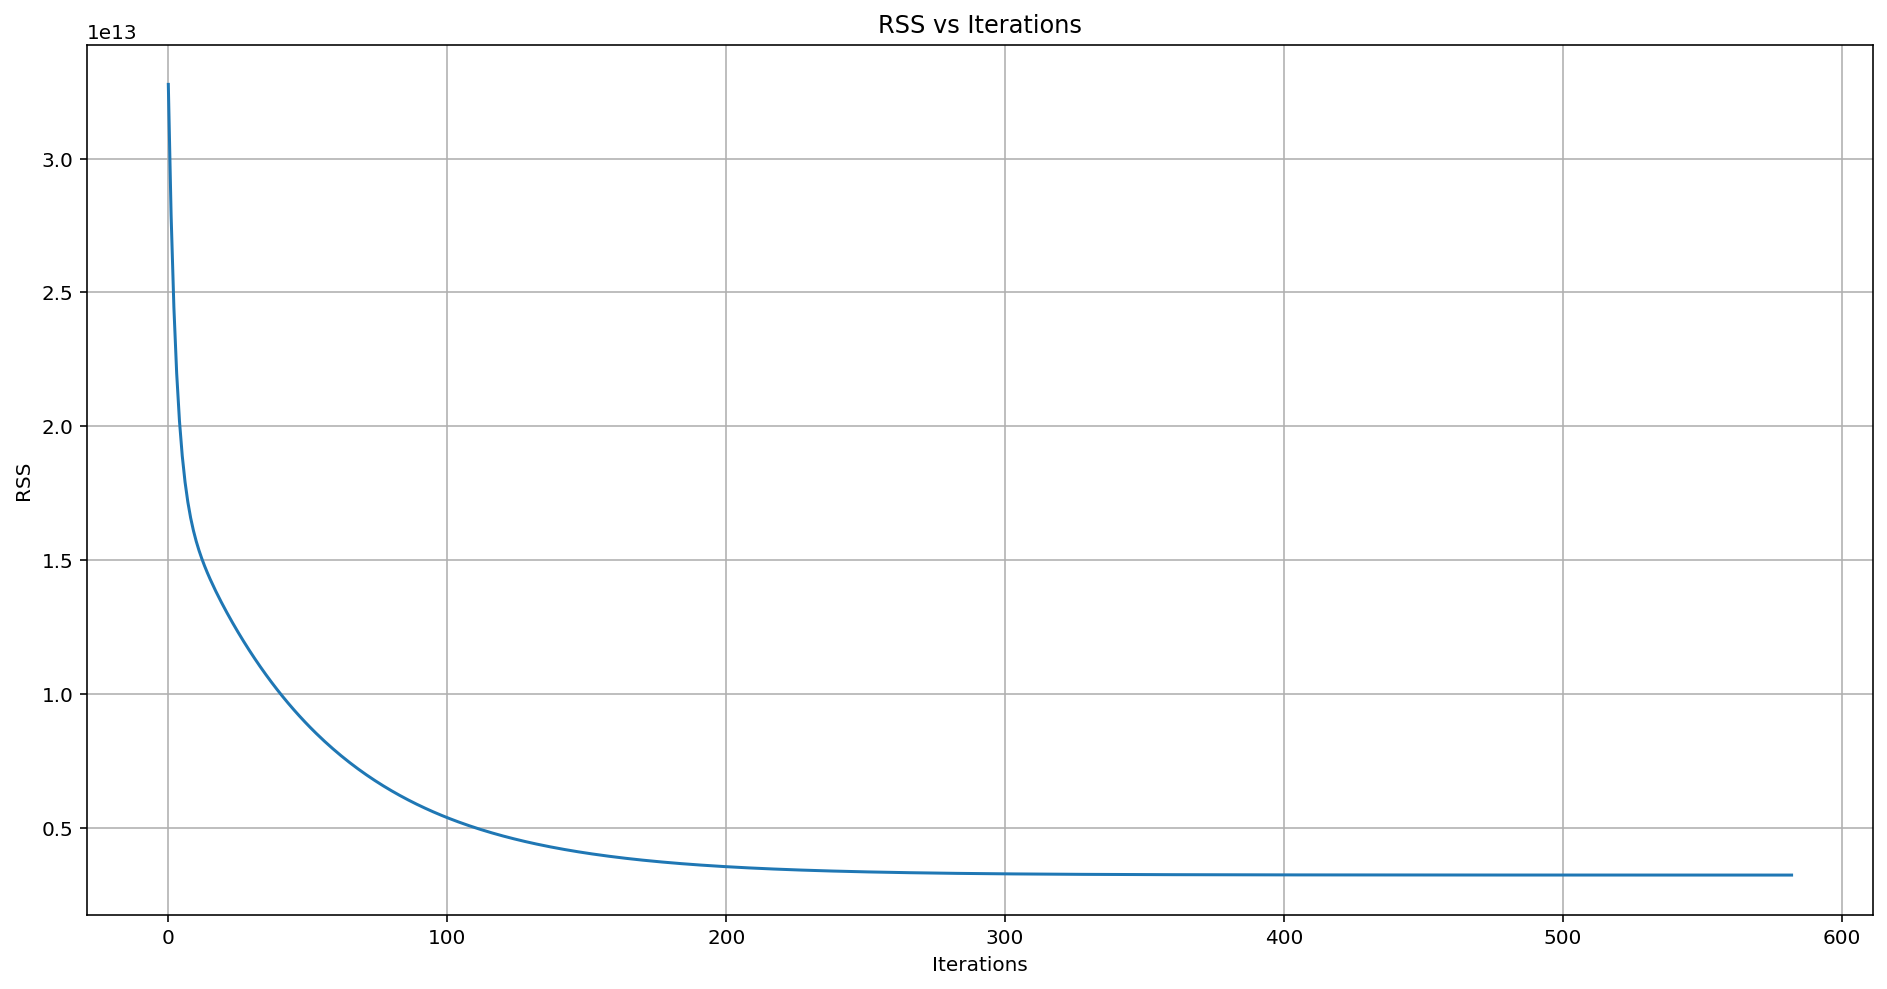

In [16]:
# Configure the plot size of matplotlib figure
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
# Create the plot
plt.plot(model1.rss_log)
plt.xlabel("Iterations")
plt.ylabel("RSS")
plt.title("RSS vs Iterations")
plt.grid()

We notice that RSS decreases with iteration. If gradient descent is converging then it decreases sharply in the very beginning, as we can see in this case RSS decreased heavily in the first quarter. After initial burst of decrease, the rate of decrease slows down, and finally the curve flattens out. 

## 5. Model with 1 more feature

**Create and fit the model**

In [17]:
model_features = ['GrLivArea', 'LotArea', 'GarageArea'] 
output = 'SalePrice'
(train_feature_matrix, train_output) = get_xy_data(train_data, model_features, output)
step_size = 4e-12
tolerance = 1e9
model2 = linear_regression(track_rss=True)
model2.fit(train_feature_matrix, train_output, step_size, tolerance, verbose=False)

**RSS of the model**

In [18]:
(test_feature_matrix, test_output) = get_xy_data(test_data, model_features, output)
print("Test RSS of model 2: ", model2.rss(test_feature_matrix, test_output))

Test RSS of model 2:  1041599839109.3499


**Plot of RSS vs Gradient Descent Iteration**

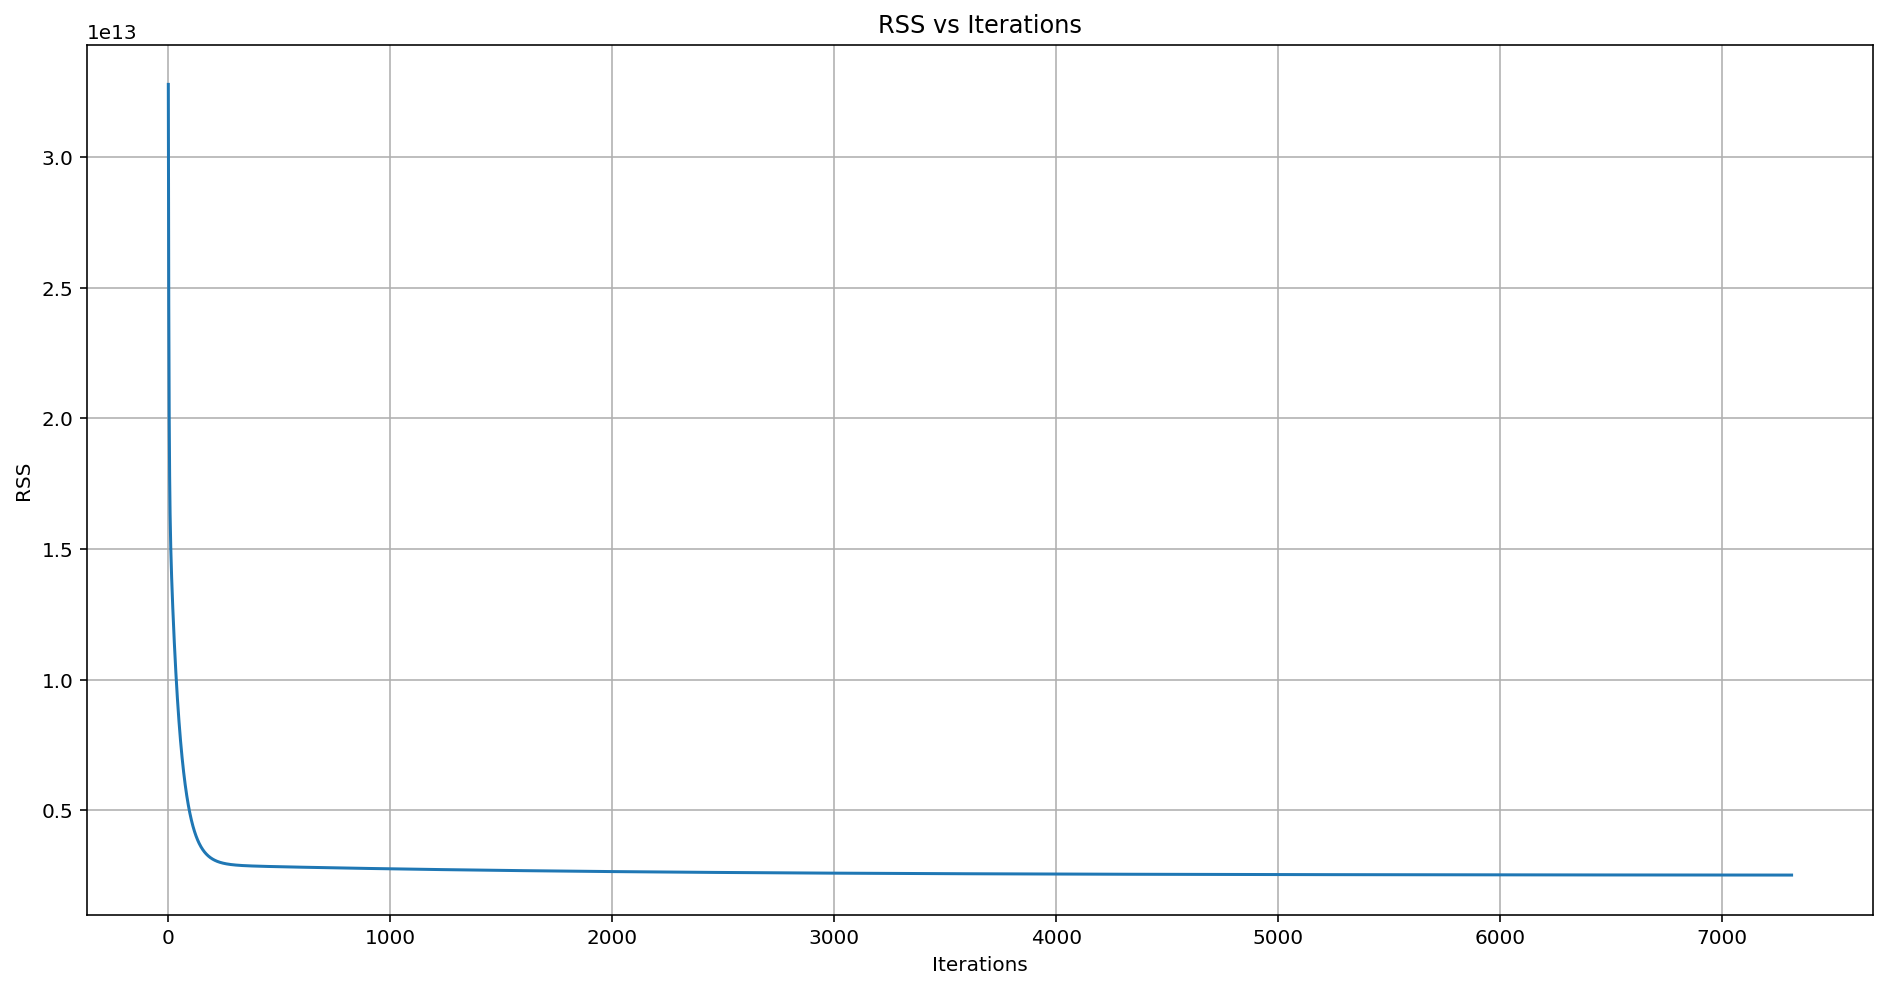

In [19]:
plt.plot(model2.rss_log)
plt.xlabel("Iterations")
plt.ylabel("RSS")
plt.title("RSS vs Iterations")
plt.grid()

## 6. Model with 3 more features

**Create and fit the model**

In [20]:
# note "3 more features" means 3 more features with respect to first model, model 1;
# and 2 more features with respect to model 2 
model_features = ['GrLivArea', 'LotArea', 'GarageArea', 'BedroomAbvGr','FullBath'] 
output = 'SalePrice'
(train_feature_matrix, train_output) = get_xy_data(train_data, model_features, output)
step_size = 4e-12
tolerance = 1e9
model3 = linear_regression(track_rss=True)
model3.fit(train_feature_matrix, train_output, step_size, tolerance, verbose=False)

**RSS of the model**

In [21]:
(test_feature_matrix, test_output) = get_xy_data(test_data, model_features, output)
print("Test RSS of model 3: ", model3.rss(test_feature_matrix, test_output))

Test RSS of model 3:  1041595782521.2959


**Plot of RSS vs Gradient Descent Iteration**

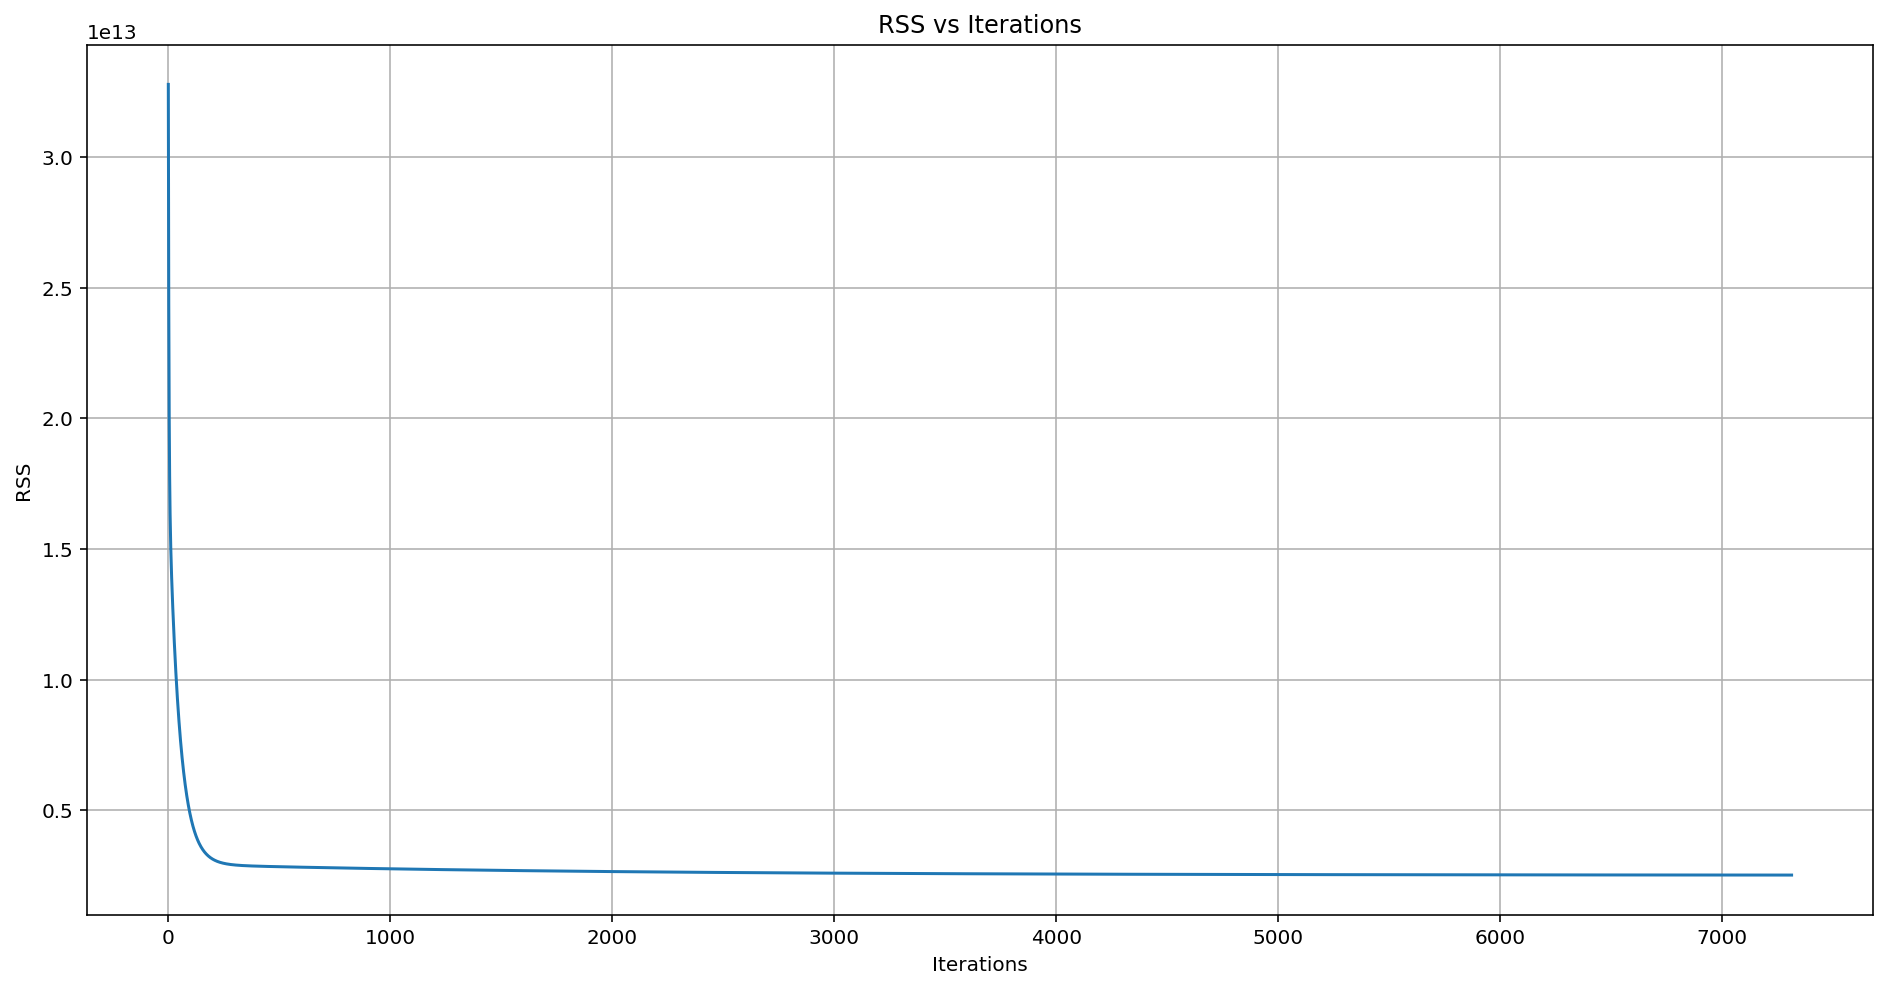

In [22]:
plt.plot(model3.rss_log)
plt.xlabel("Iterations")
plt.ylabel("RSS")
plt.title("RSS vs Iterations")
plt.grid()